In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

json = pd.read_json ('https://pomber.github.io/covid19/timeseries.json')

In [2]:
def plot_country(country):
    df = pd.json_normalize(json[country])
    diff = df[['confirmed']].diff()[1:]
    df = df[1:]
    closed = df.recovered+df.deaths
    hospitalized = df.confirmed - closed
    
    print(df.tail(1).to_string(index=False))
    print('new',diff.tail(1).to_string(index=False))

    plt.figure(figsize=(8,4))
    plt.plot(df.confirmed,label='confirmed')
    plt.plot(df.recovered,c='g',label='recovered')
    plt.plot(df.deaths,c='r',label='deaths')
    plt.plot(closed,dashes=[2,2,6, 2],c='y',label='closed')
    plt.plot(hospitalized,dashes=[2,2,6, 2],c='b',label='hospitalized')
    plt.title(country)
    plt.xlabel('day')
    plt.legend(loc='upper left')
    plt.show()
    
    plt.figure(figsize=(8,4))
    plt.scatter(df.confirmed,diff.confirmed)
    model = np.poly1d(np.polyfit(df.confirmed, diff.confirmed, 3))
    xp = np.linspace(df.confirmed.min(), df.confirmed.max(), 100)
    plt.plot(xp, model(xp), c='r')
    plt.title(country)
    plt.xlabel('confirmed')
    plt.ylabel('new confirmed per day')
    plt.show()
    
    print('closed: ',closed.iloc[-1])
    print('deaths: ',df.deaths.iloc[-1])
    print('%: ',(df.deaths.iloc[-1]/closed.iloc[-1]*100))

    plt.figure(figsize=(8,4))
    plt.scatter(df.recovered+df.deaths,df.deaths)
    plt.title(country)
    plt.xlabel('closed')
    plt.ylabel('deaths')
    plt.show()


In [3]:
# for c in json.columns:
#     print(c)


     date  confirmed  deaths  recovered
 2020-5-6       2989      55       2761
new  confirmed
       1.0


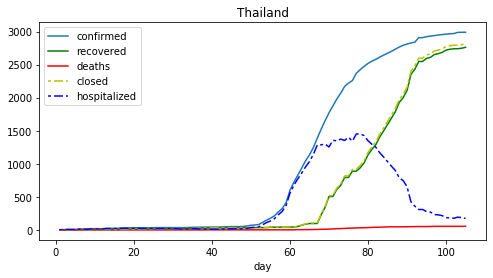

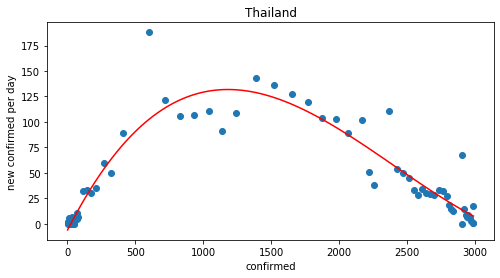

closed:  2816
deaths:  55
%:  1.953125


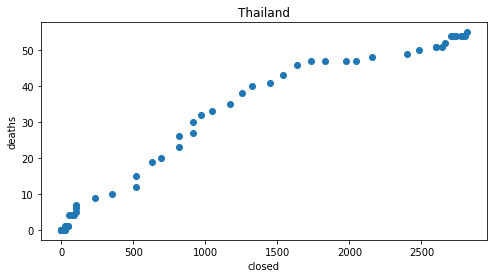

     date  confirmed  deaths  recovered
 2020-5-6     165929    1537      21327
new  confirmed
   10559.0


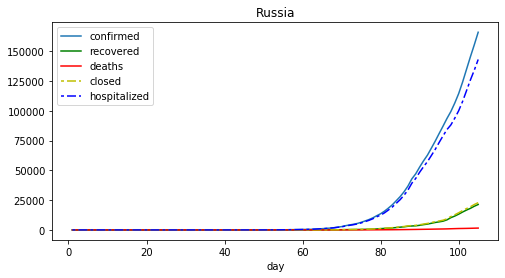

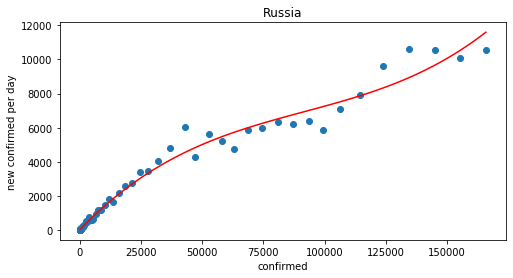

closed:  22864
deaths:  1537
%:  6.722358292512247


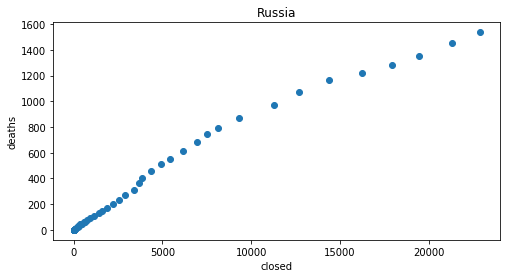

     date  confirmed  deaths  recovered
 2020-5-6      27634    2704      17781
new  confirmed
    1609.0


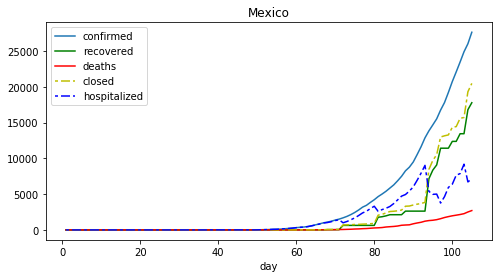

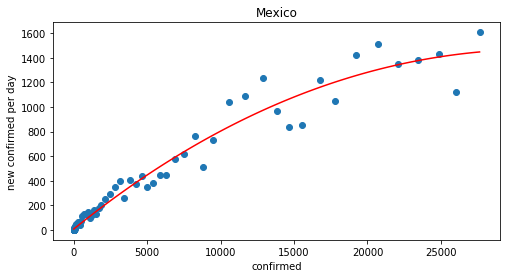

closed:  20485
deaths:  2704
%:  13.19990236758604


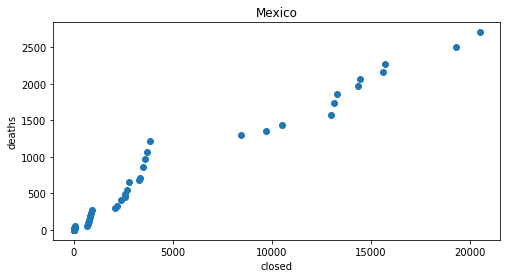

     date  confirmed  deaths  recovered
 2020-5-6     126611    8588      51370
new  confirmed
   11156.0


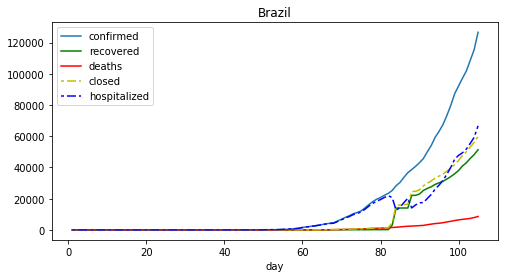

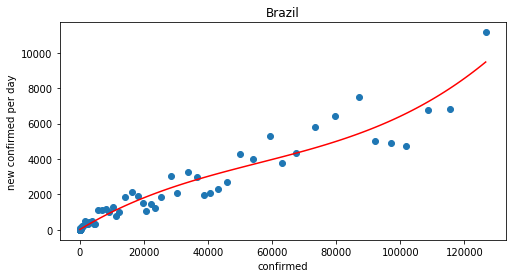

closed:  59958
deaths:  8588
%:  14.323359685112912


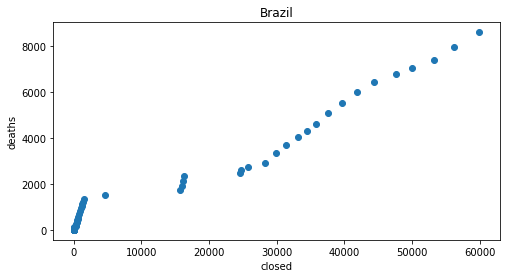

     date  confirmed  deaths  recovered
 2020-5-6       6428     107       4702
new  confirmed
      45.0


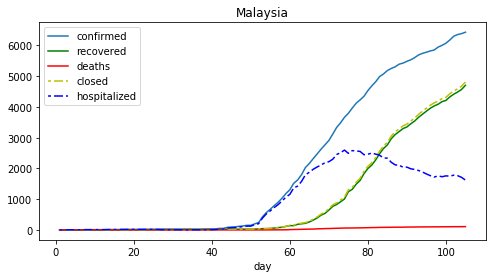

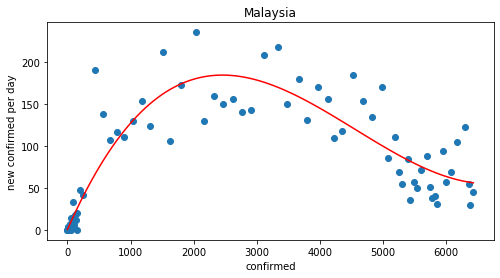

closed:  4809
deaths:  107
%:  2.2249948014140153


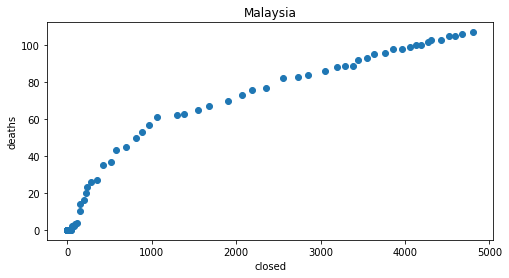

     date  confirmed  deaths  recovered
 2020-5-6      20198      20       1634
new  confirmed
     788.0


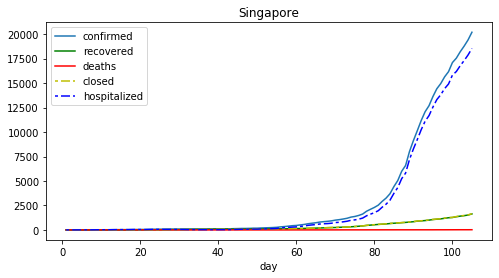

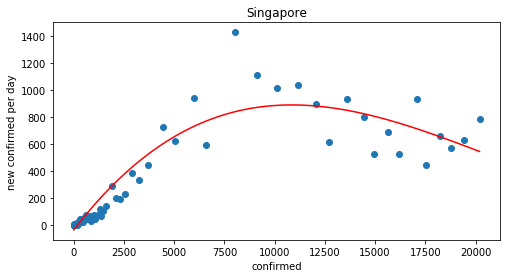

closed:  1654
deaths:  20
%:  1.2091898428053205


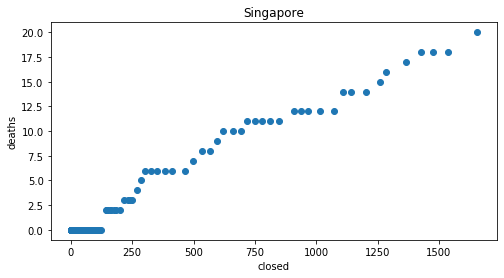

     date  confirmed  deaths  recovered
 2020-5-6      12438     895       2317
new  confirmed
     367.0


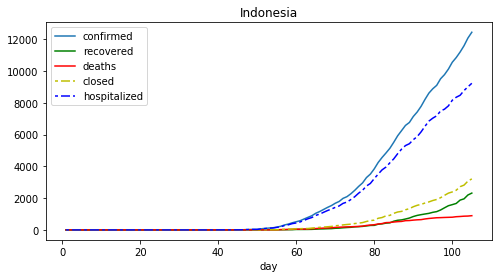

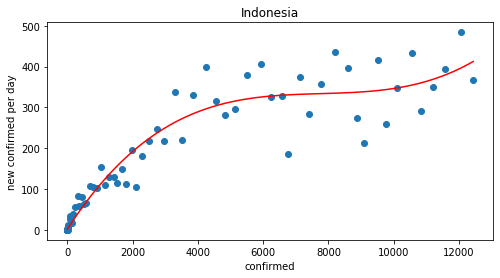

closed:  3212
deaths:  895
%:  27.86425902864259


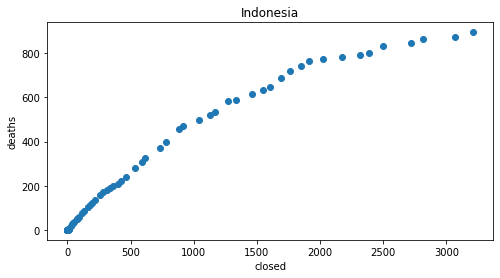

     date  confirmed  deaths  recovered
 2020-5-6    1228603   73431     189910
new  confirmed
   24252.0


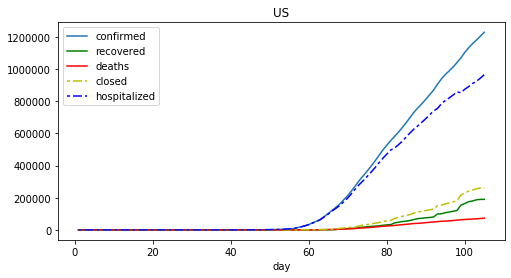

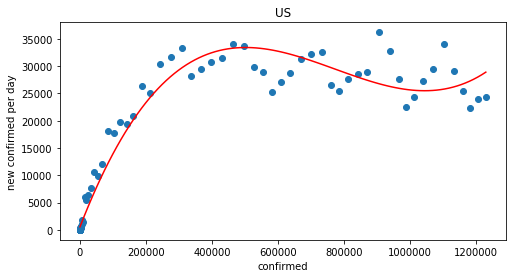

closed:  263341
deaths:  73431
%:  27.884378049752982


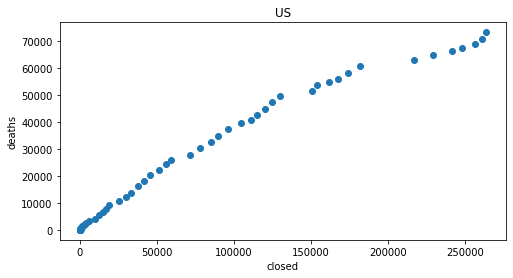

     date  confirmed  deaths  recovered
 2020-5-6      83970    4637      78929
new  confirmed
       2.0


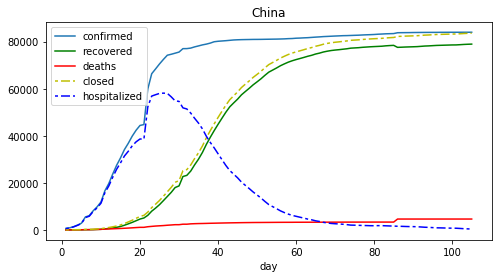

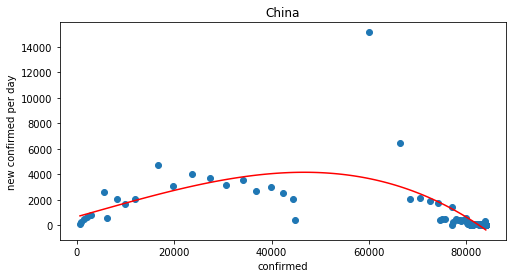

closed:  83566
deaths:  4637
%:  5.548907450398487


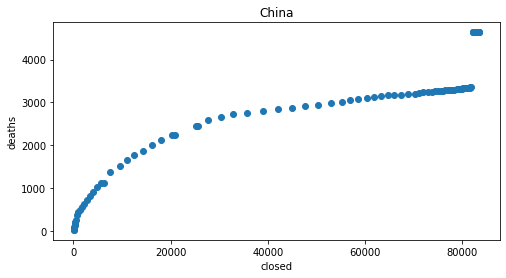

     date  confirmed  deaths  recovered
 2020-5-6      10810     256       9419
new  confirmed
       4.0


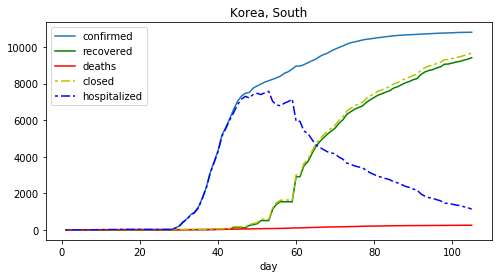

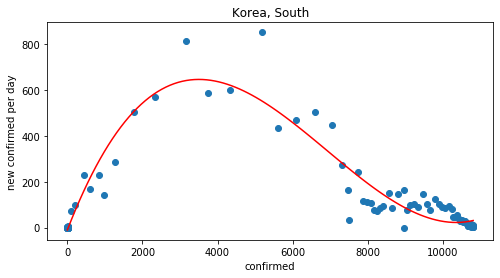

closed:  9675
deaths:  256
%:  2.645994832041344


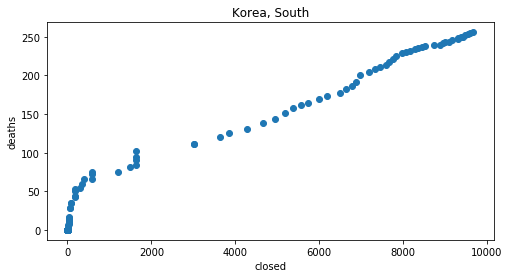

     date  confirmed  deaths  recovered
 2020-5-6     214457   29684      93245
new  confirmed
    1444.0


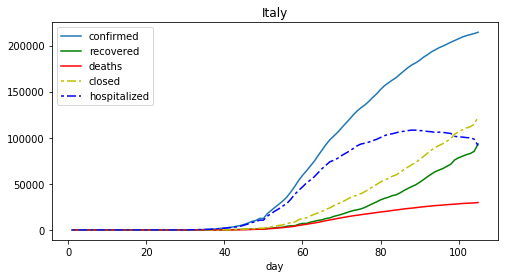

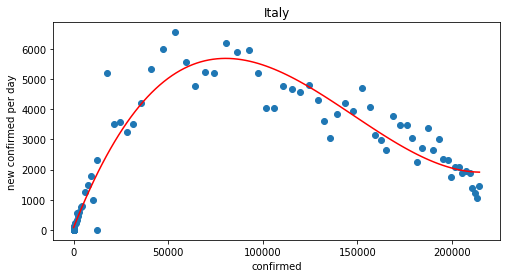

closed:  122929
deaths:  29684
%:  24.14727200253805


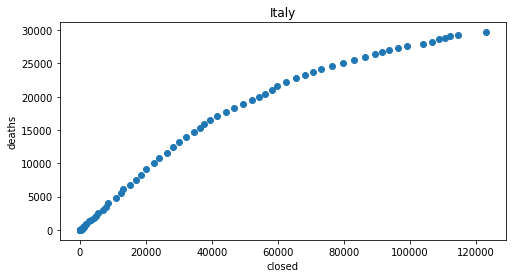

     date  confirmed  deaths  recovered
 2020-5-6     220325   25857     126002
new  confirmed
     996.0


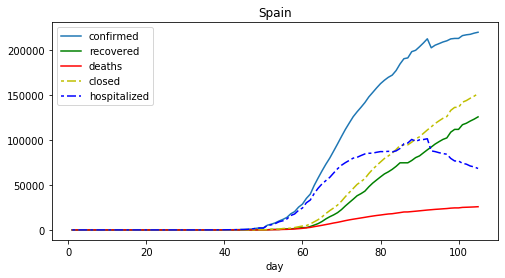

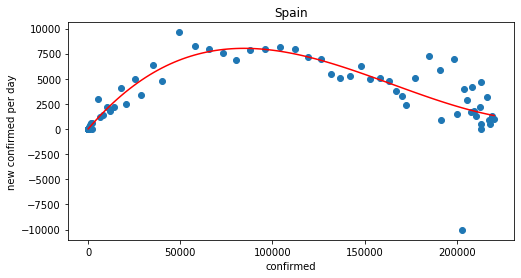

closed:  151859
deaths:  25857
%:  17.02697897391659


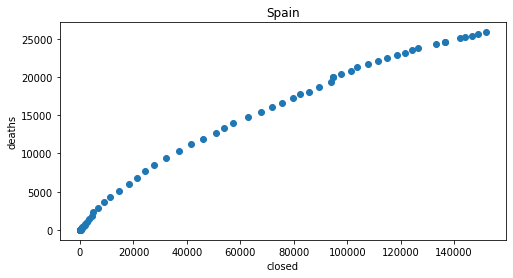

In [4]:
for c in ['Thailand','Russia','Mexico','Brazil','Malaysia','Singapore','Indonesia','US','China','Korea, South','Italy','Spain']:
    plot_country(c)
